<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/GraphAndNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
import torch 

wine_path = 'winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)



In [0]:
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [0]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [0]:
import pandas as pd
import numpy as np


df = pd.DataFrame(wineq_numpy)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
1,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
2,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
3,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
4,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
5,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25,0.01
6,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
7,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
8,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12,0.10
9,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


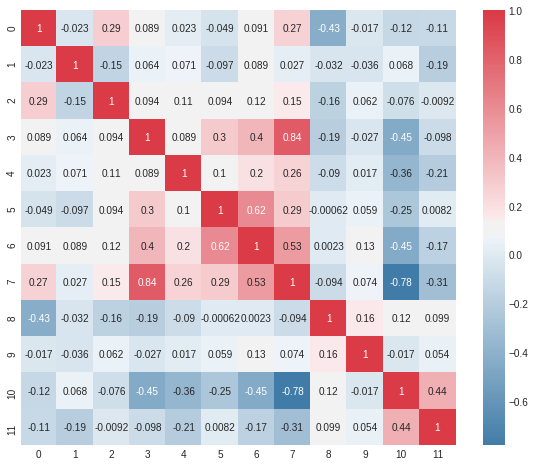

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
df = pd.DataFrame(wineq_numpy)
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

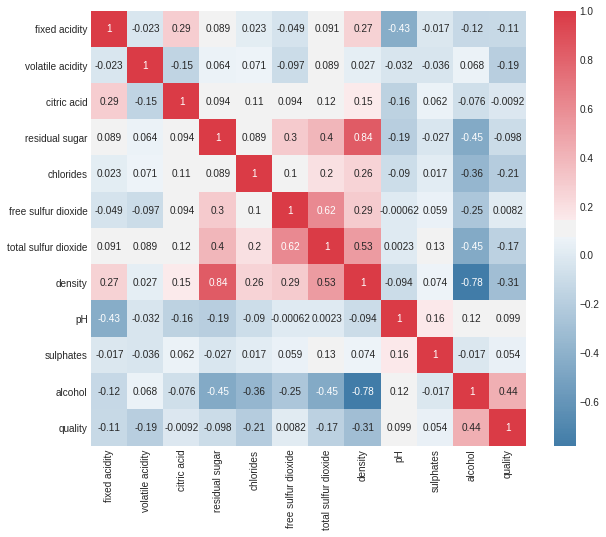

In [0]:
# Using pandas library for calculate correalation
import pandas as pd

#normalized data before apply corr function
wine_mean = wineq_numpy.mean();
wine_var = wineq_numpy.var();
wineq_numpy_normalized = (wineq_numpy - wine_mean)/np.sqrt(wine_var)
#rs = np.random.RandomState(0)
dataframe = pd.DataFrame(wineq_numpy_normalized, columns=col_list)

f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe.corr()
#Draw the matrix with labels using heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
square=True, ax=ax,  xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [0]:
#convert to Pytorch Tensor from NumPy
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [0]:
#data 
data = wineq[:,:-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [0]:
#target = wineq[:, -1].long()
target = wineq[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [0]:
#caluculate mean and variance of data
data_mean = torch.mean(data, dim = 0)
data_mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [0]:
data_var = torch.var(data, dim = 0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [0]:
#normalized data
data_normalized = (data - data_mean)/torch.sqrt(data_var)
data_normalized

tensor([[ 1.7209e-01, -8.1764e-02,  2.1325e-01,  ..., -1.2468e+00,
         -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7991e-02,  ...,  7.3992e-01,
          1.3467e-03, -8.2418e-01],
        [ 1.4756e+00,  1.7448e-02,  5.4378e-01,  ...,  4.7502e-01,
         -4.3677e-01, -3.3662e-01],
        ...,
        [-4.2042e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3131e+00,
         -2.6152e-01, -9.0544e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0048e+00,
         -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7502e-01,
         -1.4882e+00,  1.0448e+00]])

In [0]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [0]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [0]:
data.shape, target.shape


(torch.Size([4898, 11]), torch.Size([4898]))

In [0]:
data[1,:]

tensor([6.3000e+00, 3.0000e-01, 3.4000e-01, 1.6000e+00, 4.9000e-02, 1.4000e+01,
        1.3200e+02, 9.9400e-01, 3.3000e+00, 4.9000e-01, 9.5000e+00])

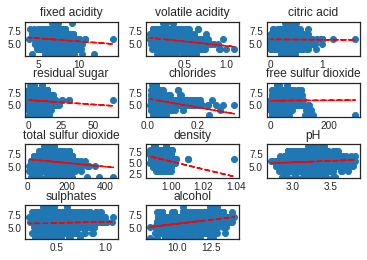

In [0]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
y = target
fig = plt.figure()
fig.subplots_adjust(hspace=0.8, wspace=0.3)
for i in range(1, 12):
	plt.subplot(4, 3, i)
	x = data[:,i-1]
	plt.scatter(x,y)

	m, b = np.polyfit(x, y, 1)
	plt.plot(x, m*x + b,'r--')
	plt.title(col_list[i-1])

In [0]:
import matplotlib.pyplot as plt

In [0]:
import torch.nn as nn
import torch.optim as optim



#seperate data for traning and validate set
n_samples = target.shape[0]
n_val = int(0.2*n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:n_val]
val_indices = shuffled_indices[-n_val:]

# data for training
train_data = data[train_indices]
train_data_n = data_normalized[train_indices]
train_target = target[train_indices]
# data for validation
val_data = data[val_indices]
val_data_n = data_normalized[val_indices]
val_target = target[val_indices]


In [0]:
num_features = 11
model = nn.Linear(num_features,1) #
#model(train_data).shape
#model.weight, model.bias
optimizer = optim.SGD(
    model.parameters(),
    lr=1e-2
)

In [0]:
model.parameters()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0835, -0.2269,  0.1669, -0.1559,  0.2006,  0.1495,  0.2227,  0.0961,
           0.1960,  0.2933, -0.0413]], requires_grad=True),
 Parameter containing:
 tensor([0.1286], requires_grad=True)]

In [0]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_data, train_target, val_data, val_target):
    tl = [] # training loss
    vl = [] # validation loss
    n  = []
    for epoch in range(1, n_epochs+1): # one epoch: entire dataset is passed through NN once

        # Attatching model and loss function
        train_pred = model(train_data)  
        loss_train = loss_fn(train_pred, train_target)

        # To validate the model, we measure the testing error with testing data
        val_pred = model(val_data)
        loss_val = loss_fn(val_pred, val_target)

        # Attach optimizer to train the model
        optimizer.zero_grad() # should initialize gradient value at each iteration
        loss_train.backward() # gradinet is calculated
        optimizer.step() # parameter updates using gradient
        
        
        if epoch==1 or epoch % 1000 ==0:
          print('Epoch {}, Training loss {}, Validation loss {}'. format(
              epoch, float(loss_train), float(loss_val)
              ))
          tl.append(float(loss_train))#.unsqueeze(0)
          vl.append(float(loss_val)) #.unsqueeze(0)
          n.append(epoch)
        
    return tl, vl, n

In [0]:
var = [] 
for I in range(0, 10):
    new_stuff = torch.tensor(I)# do stuff 
    var.append(new_stuff.unsqueeze(0))
var_tensor = torch.cat(var)
var_tensor

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
# Learning simple linear model
import torch.nn as nn
import torch.optim as optim

# Simple Linear Model
num_features = 11
model = nn.Linear(num_features,1) # Simple Linear Model without Activation Function
optimizer= optim.SGD(model.parameters(), lr=1e-3) # Stochastic Gradient Descent
loss_fn =nn.MSELoss() # Mean Squared Error

train_loss, val_loss, n = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model=model,
    loss_fn= loss_fn,
    train_data = train_data_n,
    train_target = train_target,
    val_data = val_data_n,
    val_target = val_target
)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([979])) that is different to the input size (torch.Size([979, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 38.3662223815918, Validation loss 38.047237396240234
Epoch 1000, Training loss 1.5705317258834839, Validation loss 1.5505905151367188
Epoch 2000, Training loss 0.8700019121170044, Validation loss 0.8196046948432922
Epoch 3000, Training loss 0.8518056273460388, Validation loss 0.8016180992126465
Epoch 4000, Training loss 0.8503388166427612, Validation loss 0.8004306554794312
Epoch 5000, Training loss 0.850006103515625, Validation loss 0.8002088069915771


(0.8499341607093811, 0.7999579906463623)

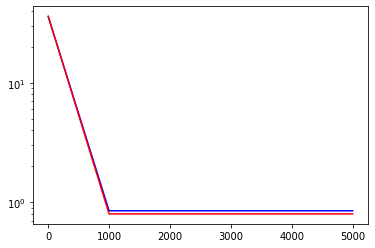

In [0]:
import matplotlib.pyplot as plt

#n = range(1, 5000 + 1)
plt.plot(n, train_loss,'b-')
plt.plot(n, val_loss,'r-')
plt.yscale('log')


In [0]:
len(train_loss),len(n), 

(6, 6)

#Model Training with Neural Network

In [0]:
seq_model = nn.Sequential(
    nn.Linear(num_features, 16),
    nn.Tanh(),
    #nn.Linear(8, 4),
    #nn.ReLU(),
    nn.Linear(16,1)
)
seq_model

Sequential(
  (0): Linear(in_features=11, out_features=16, bias=True)
  (1): Tanh()
  (2): Linear(in_features=16, out_features=1, bias=True)
)

In [0]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-2)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model=seq_model,
    loss_fn= loss_fn,
    train_data = train_data_n,
    train_target = train_target,
    val_data = val_data_n,
    val_target = val_target
)

#Alternate features for training

In [0]:
Selected_features = [1, 4, 7, 10]
# data for training
train_X = data[:,Selected_features]
train_X = train_X[train_indices]
train_Xn = data_normalized[:, Selected_features]
train_Xn = train_Xn[train_indices]
train_Y = target[train_indices]
# data for validation
val_X = data[:,Selected_features]
val_X = val_X[val_indices]
val_Xn = data_normalized[:, Selected_features]
val_Xn = val_Xn[val_indices]
val_Y = target[val_indices]

In [0]:
num_features = len(Selected_features)
seq_model = nn.Sequential(
    nn.Linear(num_features, 16),
    nn.Tanh(),
    nn.Linear(16, 4),
    nn.LeakyReLU(),
    nn.Linear(4, 2),
    nn.ReLU(),
    nn.Linear(2,1)
)
seq_model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): Tanhshrink()
  (2): Linear(in_features=16, out_features=4, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=4, out_features=2, bias=True)
  (5): ReLU()
  (6): Linear(in_features=2, out_features=1, bias=True)
)

#Training and Validation

# New Section

In [0]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
traing_loss, val_loss, n = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model=seq_model,
    loss_fn= loss_fn,
    train_data = train_Xn,
    train_target = train_Y,
    val_data = val_Xn,
    val_target = val_Y
)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([979])) that is different to the input size (torch.Size([979, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 0.8499754667282104, Validation loss 0.8005884289741516
Epoch 1000, Training loss 0.8499779105186462, Validation loss 0.8005820512771606
Epoch 2000, Training loss 0.8499730825424194, Validation loss 0.8005678057670593
Epoch 3000, Training loss 0.8499730229377747, Validation loss 0.8005536198616028
Epoch 4000, Training loss 0.8499731421470642, Validation loss 0.8005473017692566
Epoch 5000, Training loss 0.8499701023101807, Validation loss 0.8005382418632507


num	 epoch	 training_loss	 validation_loss 
 0	    1	 38.366222	 44.334671
 1	 1000	 1.570532	 0.860687
 2	 2000	 0.870002	 0.841134
 3	 3000	 0.851806	 0.830232
 4	 4000	 0.850339	 0.823280
 5	 5000	 0.850006	 0.818547


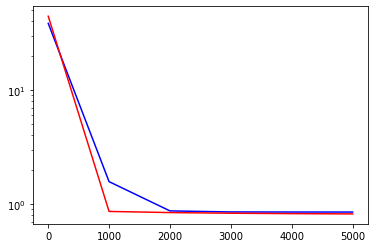

In [0]:
import matplotlib.pyplot as plt

#n = range(1, 5000 + 1)
plt.plot(n, train_loss,'b-')
plt.plot(n, val_loss,'r-')
plt.yscale('log')
print('num\t epoch\t training_loss\t validation_loss ')
for i, args in enumerate(zip(n, train_loss, val_loss)):
    print('{:2}\t {:4}\t {:6.6f}\t {:6.6f}'.format(i, *args))